In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/particle_analysis

/content/drive/MyDrive/particle_analysis


In [3]:

!pip install arrow
!pip install loguru
!pip install opencv-python matplotlib
!pip install 'git+https://github.com/facebookresearch/sam2.git'

import os

file_path = "/content/drive/MyDrive/particle_analysis/checkpoints/sam2.1_hiera_large.pt"
checkpoint_folder="/content/drive/MyDrive/particle_analysis/checkpoints/"

if not os.path.exists(file_path):
    os.makedirs(checkpoint_folder, exist_ok=True)
    !wget -P /content/drive/MyDrive/particle_analysis/checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt
    print("File downloaded successfully.")
else:
    print("File already exists, skipping download.")


#!pip install git+https://github.com/facebookresearch/segment-anything.git

#!mkdir -p /content/weights

#!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P /content/weights

  Cloning https://github.com/facebookresearch/sam2.git to /tmp/pip-req-build-vligey02
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/sam2.git /tmp/pip-req-build-vligey02
  Resolved https://github.com/facebookresearch/sam2.git to commit c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
File already exists, skipping download.


##Analyse pictures one by one

Image found: /content/drive/MyDrive/particle_analysis/modified gain.png
Base image saved as: /content/drive/MyDrive/particle_analysis/base_image_modified gain.png
Final overlaid image saved as: /content/drive/MyDrive/particle_analysis/modified gain.png
2024-11-11T07:19:51.832


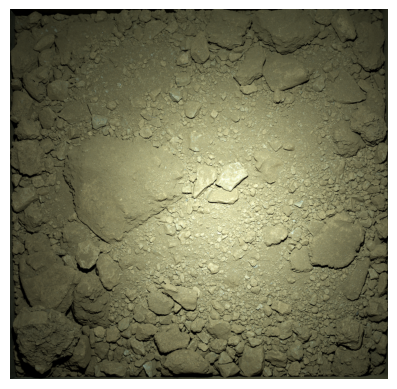

In [4]:
import SegmentationAnalysisModel as pa

#chnage to whereever the images are stored - TODO for loop to run though all the image samples
image_folder_path='/content/drive/MyDrive/particle_analysis'
checkpoint_folder='/content/drive/MyDrive/particle_analysis/checkpoints'
sampleID="modified gain"

#in mm
containerWidth=180
#initialise analyser
analyser=pa.SegmentationAnalysisModel(image_folder_path,sampleID,containerWidth)
analyser.showImage()



2024-11-11 07:24:23.846 | INFO     | ParticleSegmentationModel:generate_mask:92 - Generating masks - image: /content/drive/MyDrive/particle_analysis/Samples/0000/improved lighting.png, scaling factor: 0.16901408450704225 um/px, sam_checkpoint: /content/drive/MyDrive/particle_analysis/checkpoints/sam2.1_hiera_large.pt, points_per_side: 150,points_per_batch: 128, pred_iou_thresh: 0.8, stability_score_thresh: 0.92,             stability_score_offset:0.8, crop_n_layers: 2, crop_n_points_downscale_factor: 2, min_mask_region_area: 0.0, box_nms_tresh: 0.9, use_m2m: (True,)
using device: cuda
2024-11-11 07:27:00.083 | INFO     | ParticleSegmentationModel:generate_mask:115 - Generating masks took: 0:02:36.235019


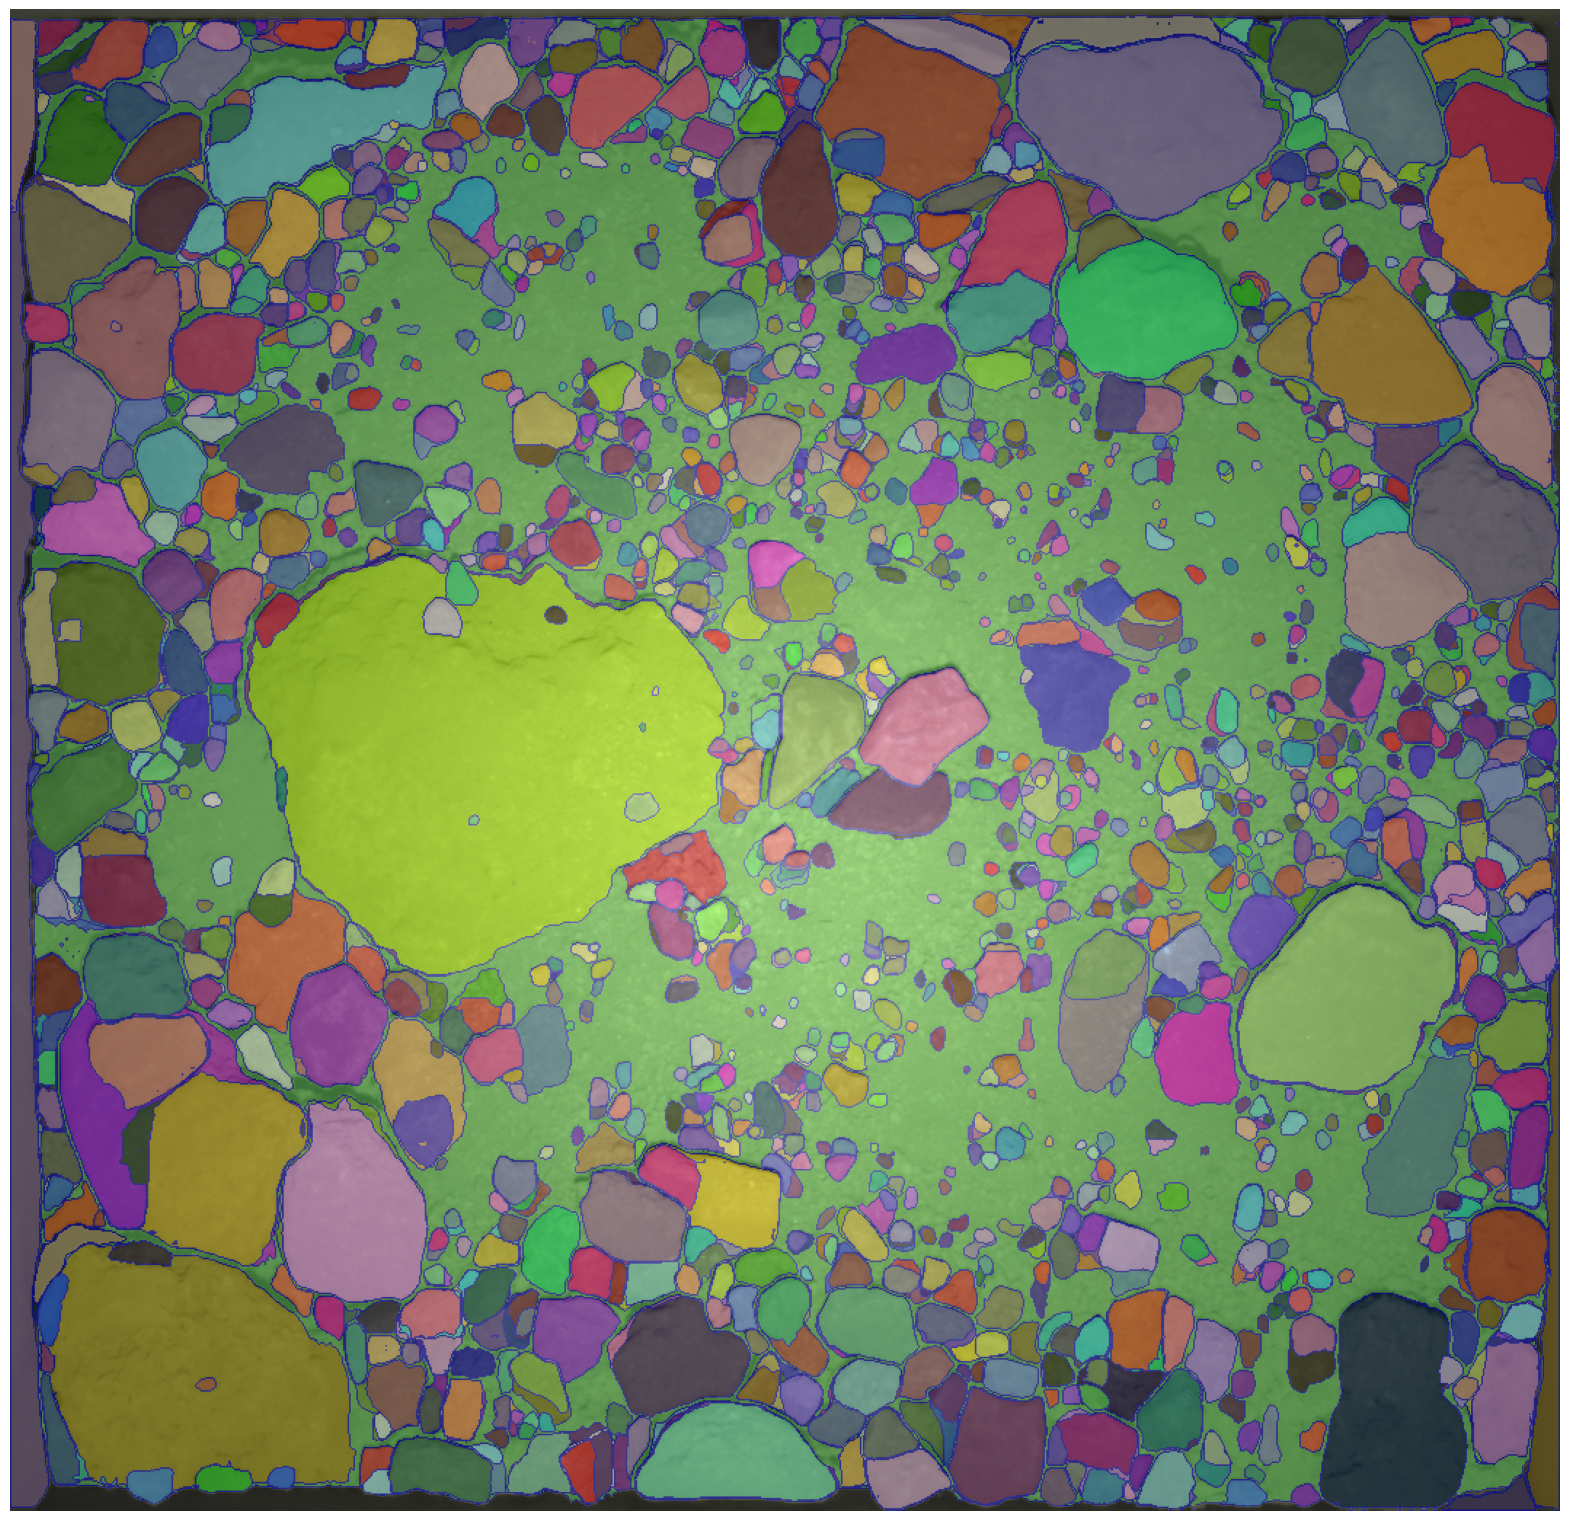

In [7]:
analyser.analyseParticles(checkpoint_folder)
analyser.showMasks()

In [ ]:
analyser.saveResults()

In [ ]:
analyser.formatResults()

##Do it for all pictures in Samples folder

Opening first image in folder: 0000
Sample ID: improved lighting
subfolder_path: /content/drive/MyDrive/particle_analysis/Samples/0000

Image found: /content/drive/MyDrive/particle_analysis/Samples/0000/improved lighting.png
Base image saved as: /content/drive/MyDrive/particle_analysis/Samples/0000/base_image_improved lighting.png
Final overlaid image saved as: /content/drive/MyDrive/particle_analysis/Samples/0000/improved lighting.png
2024-11-11T08:22:55.816


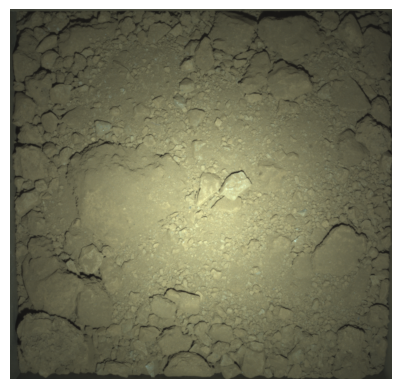

2024-11-11 08:22:56.280 | INFO     | ParticleSegmentationModel:generate_mask:92 - Generating masks - image: /content/drive/MyDrive/particle_analysis/Samples/0000/improved lighting.png, scaling factor: 0.16901408450704225 um/px, sam_checkpoint: /content/drive/MyDrive/particle_analysis/checkpoints/sam2.1_hiera_large.pt, points_per_side: 150,points_per_batch: 128, pred_iou_thresh: 0.8, stability_score_thresh: 0.92,             stability_score_offset:0.8, crop_n_layers: 2, crop_n_points_downscale_factor: 2, min_mask_region_area: 0.5, box_nms_tresh: 0.9, use_m2m: (True,)
using device: cuda


In [ ]:
import SegmentationAnalysisModel as pa

image_folder_path='/content/drive/MyDrive/particle_analysis/Samples'
checkpoint_folder='/content/drive/MyDrive/particle_analysis/checkpoints'
#in mm
containerWidth=180

for subfolder in os.listdir(image_folder_path):
  subfolder_path = os.path.join(image_folder_path, subfolder)

  # Check if it's a directory (ignore files in the main folder)
  if os.path.isdir(subfolder_path):
    print(f"Opening first image in folder: {subfolder}")

    # Loop through each file in the subfolder
    for file_name in os.listdir(subfolder_path):
      # Check if the file is a PNG or BMP image
      if file_name.lower().endswith(('.png', '.bmp')):
        sampleID = os.path.splitext(file_name)[0]
        print(f"Sample ID: {sampleID}")
        break
    if sampleID is not None:
      print(f"subfolder_path: {subfolder_path}")
      print()
      #initialise analyser
      analyser=pa.SegmentationAnalysisModel(subfolder_path,sampleID,containerWidth)
      analyser.showImage()
      analyser.analyseParticles(checkpoint_folder)
      analyser.showMasks()
      analyser.saveResults()
      analyser.formatResults()
      sampleID=None

